In [2]:
##Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
##Uploading dataset
df = pd.read_csv("dataset/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [58]:
##Checking types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [59]:
##Looking for the shape
df.shape

(10000, 14)

In [61]:
##Number of NaN
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [62]:
##Number of duplicated
df["CustomerId"].duplicated().sum()

np.int64(0)

In [63]:
##Removing unnecessary data
df = df.drop(["RowNumber", "CustomerId", "Surname"],axis= 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [64]:
##Checking age values
df["Age"].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [65]:
##Removing anomalies
df = df[(df["Age"] >= 20) & (df["Age"] <= 65)]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [66]:
##Checking the countries users are from
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [67]:
##Checking tenure data
df["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [68]:
##Removing anomalies
df = df[df["Tenure"] != 0]
df["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9])

In [69]:
##Comparison between those who exited and those who stayed 
df["Exited"].value_counts()

Exited
0    7381
1    1905
Name: count, dtype: int64

In [70]:
##Preparing data for analysis of users by gender and by country
gender_by_country = df.pivot_table(index="Gender", columns="Geography", values = "CreditScore", aggfunc= "count")
gender_by_country

Geography,France,Germany,Spain
Gender,,,
Female,2089,1106,1017
Male,2572,1224,1278


In [71]:
##Creating function of label processing
def func(pct, allvals):
    absolute = round(pct/100. * np.sum(allvals))
    return f"{pct:.1f}% \n{absolute}"

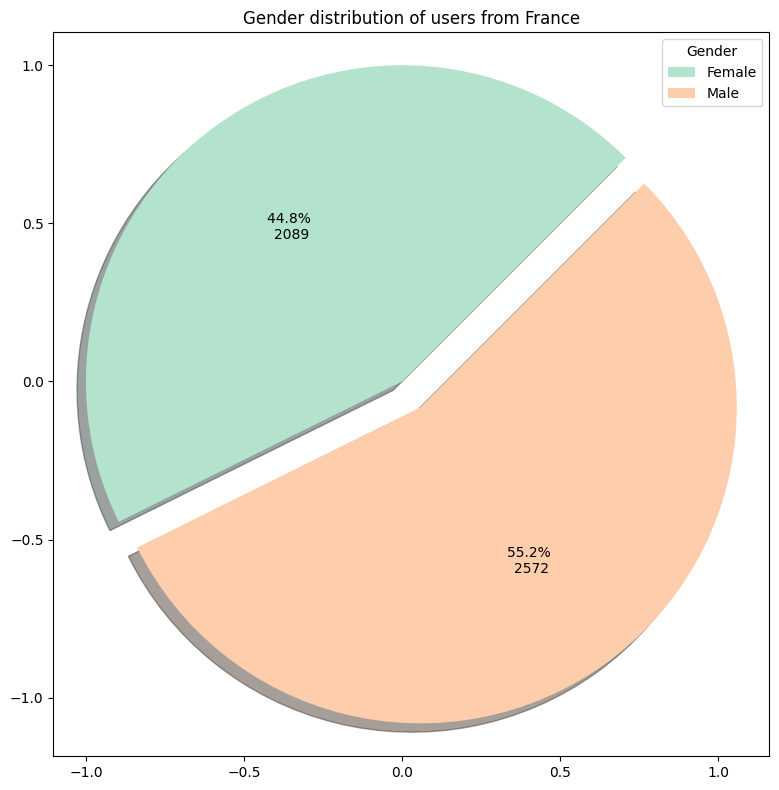

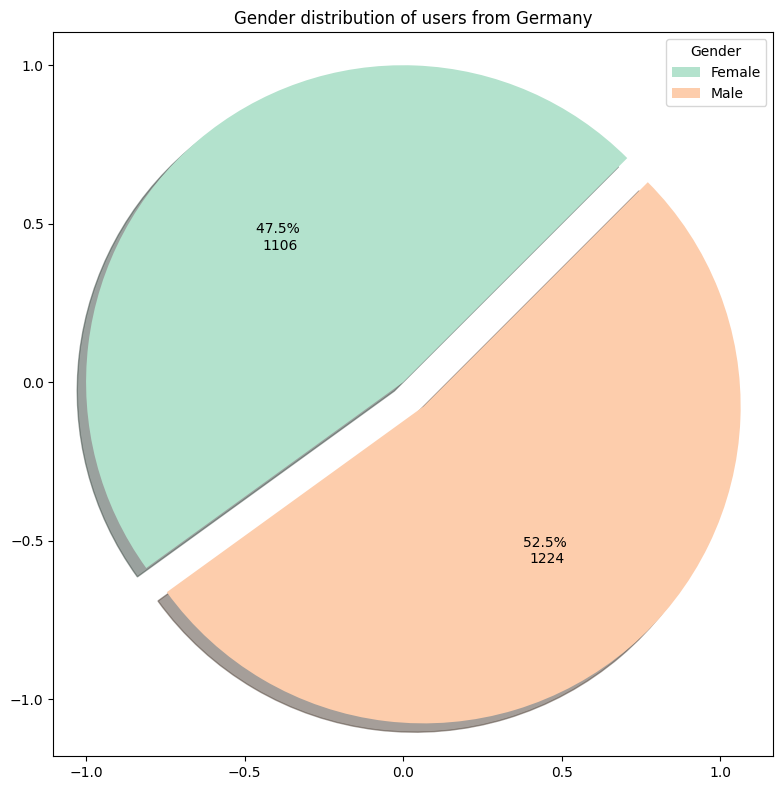

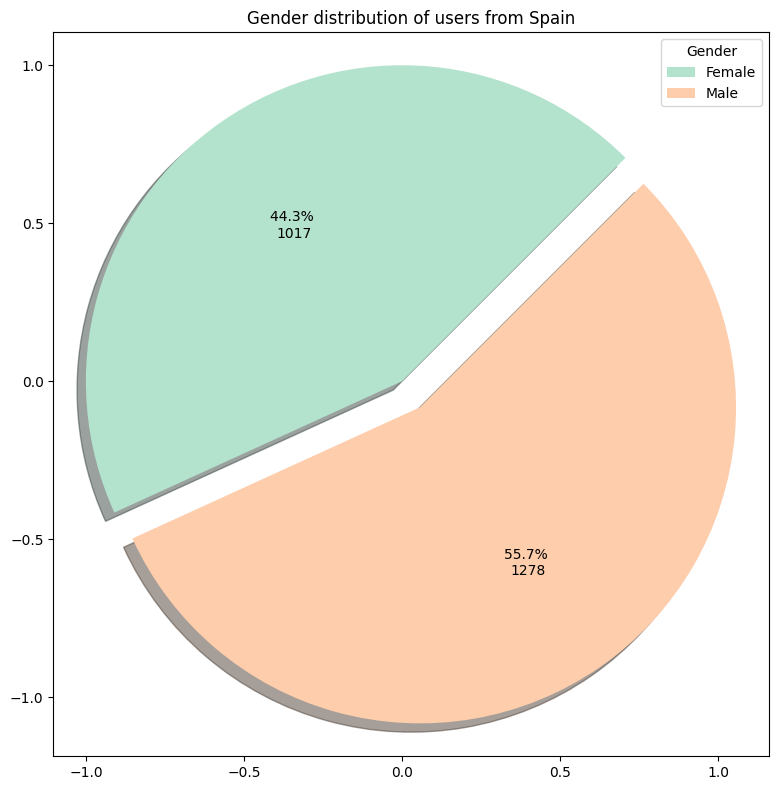

In [38]:
##Creating plots of gender distributions from different countries
explode = (0, 0.1)
columns = gender_by_country.columns
for i in columns:
    plt.figure(figsize=(10,8))
    plt.title(f"Gender distribution of users from {i}")
    plt.pie(gender_by_country[i], autopct= lambda pct: func(pct, np.sum(gender_by_country[i].values)), explode=explode, 
            shadow=True, startangle=45, colors=plt.cm.Pastel2.colors, frame=True)
    plt.legend(gender_by_country[i].index, title= "Gender")
    plt.tight_layout()
    plt.savefig(f"img/{i}_gender_distribution.png")
    plt.show()
    

Correlation is simillar for each country. Mostly it is half by half, but men registrated there is a little more than women

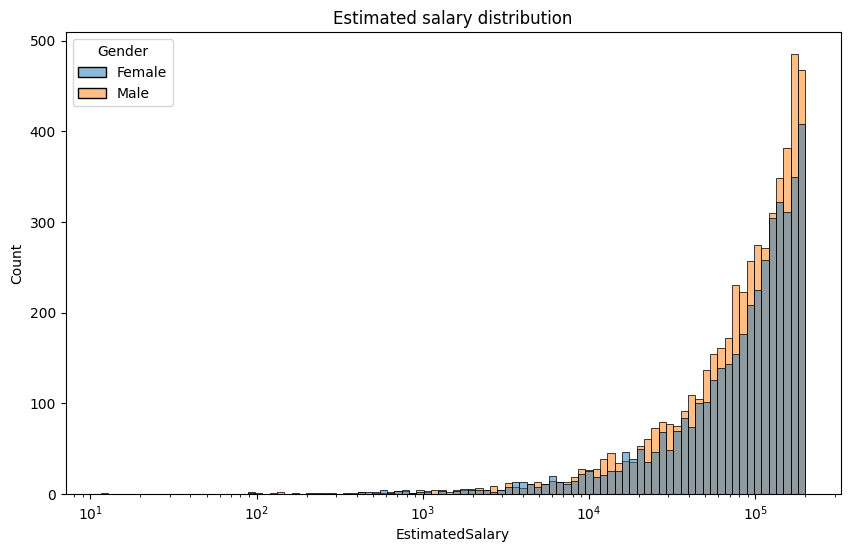

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="EstimatedSalary", hue="Gender", log_scale=True)
plt.title("Estimated salary distribution")
plt.savefig("img/Estimated_salary_by_gender.png")
plt.show()

Male workers have more estimated salary than women 

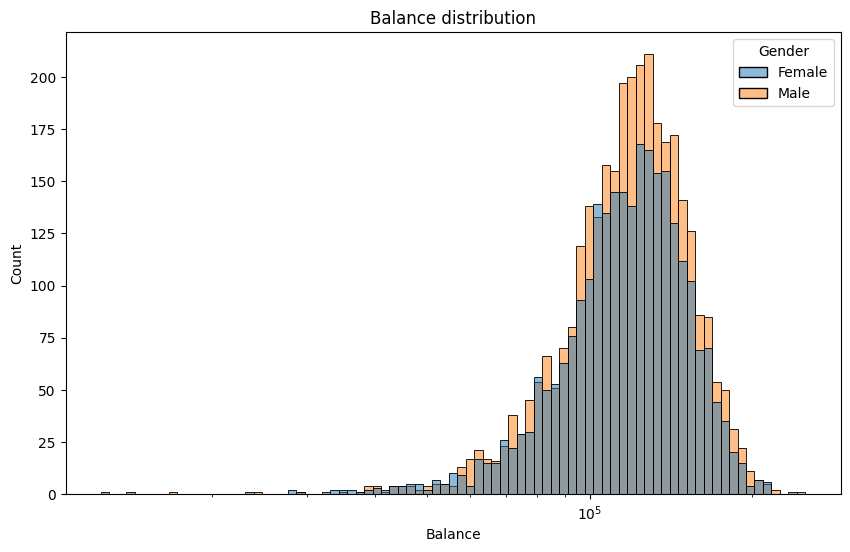

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Balance", hue="Gender", log_scale=True)
plt.title("Balance distribution")
plt.savefig("img/balance_by_gender.png")
plt.show()

Balance distribution looks like normal distribution shifted to right(More men have a big amount of money on balance)

In [72]:
##Adding age distribution column
bins = [18,25,35,45,55,65]
labels = ["18-24", "25-34", "35-44", "45-54", "55-65",]
df['age_cohort'] = pd.cut(df["Age"], bins=bins, labels=labels)
df

C:\Users\ylokt\AppData\Local\Temp\ipykernel_4536\1921587977.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_cohort'] = pd.cut(df["Age"], bins=bins, labels=labels)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_cohort
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,35-44
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,35-44
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,35-44
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,35-44
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,35-44
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,25-34
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,35-44
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,35-44


C:\Users\ylokt\AppData\Local\Temp\ipykernel_4536\3849009436.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  summary_info = df[df["Exited"] == 1].pivot_table(index=["Gender", "Geography"],columns="age_cohort", values="Exited", aggfunc="count")


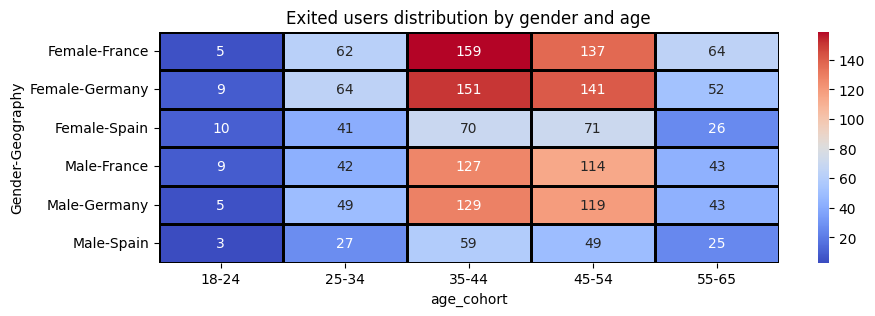

In [73]:
##Distribution of exited users by age and gender
summary_info = df[df["Exited"] == 1].pivot_table(index=["Gender", "Geography"],columns="age_cohort", values="Exited", aggfunc="count")
plt.figure(figsize=(10, len(summary_info) * 0.5))
sns.heatmap(summary_info, annot=True, fmt='g', cmap="coolwarm", cbar=True, linewidths=1, linecolor='black')
plt.title("Exited users distribution by gender and age")
plt.savefig("img/exited_by_age_and_gender.png")
plt.show()

The most part of people left are female from Germany and France aged from 35 to 54 years

C:\Users\ylokt\AppData\Local\Temp\ipykernel_4536\1518080487.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  summary_info = df[df["IsActiveMember"] == 1].pivot_table(index=["Gender", "Geography"],columns="age_cohort", values="Exited", aggfunc="count")


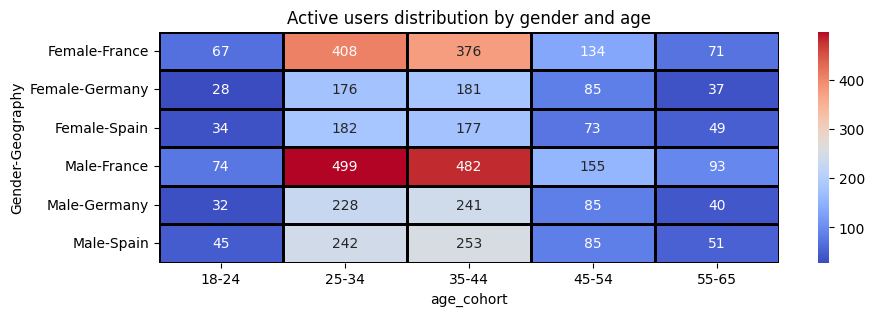

In [74]:
##Distribution of active users by gender and age
summary_info = df[df["IsActiveMember"] == 1].pivot_table(index=["Gender", "Geography"],columns="age_cohort", values="Exited", aggfunc="count")
plt.figure(figsize=(10, len(summary_info) * 0.5))
sns.heatmap(summary_info, annot=True, fmt='g', cmap="coolwarm", cbar=True, linewidths=1, linecolor='black')
plt.title("Active users distribution by gender and age")
plt.savefig("img/active_by_age_and_gender.png")
plt.show()

Most active users are male and female from France aged from 25 to 44 

In [84]:
##Preparing data for age analysis 
age = df.groupby(by="age_cohort")["Geography"].count()
colors = sns.color_palette("hls", len(age.index))

C:\Users\ylokt\AppData\Local\Temp\ipykernel_4536\1299639677.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age = df.groupby(by="age_cohort")["Geography"].count()


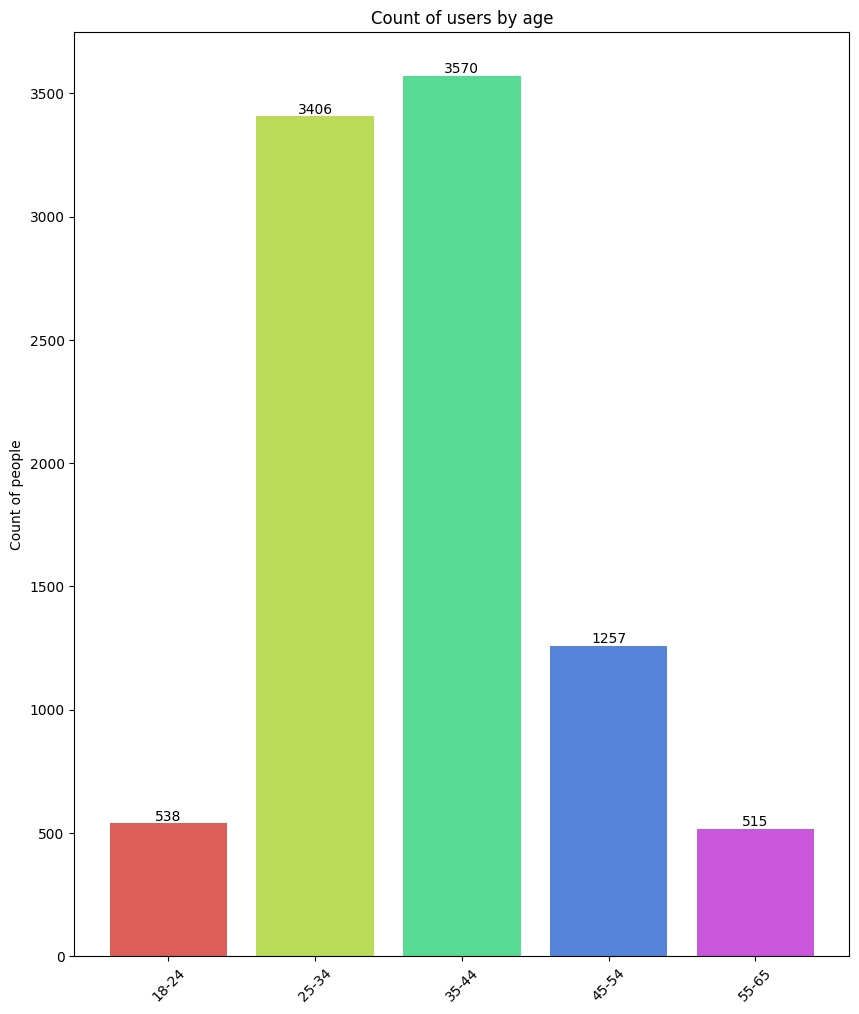

In [85]:
##Age analysis
fig, ax = plt.subplots(figsize=(10,12))
bar_container = ax.bar(age.index, age.values, color=colors)
ax.bar_label(bar_container, fmt=lambda x: f'{round(x)}')
ax.set(ylabel="Count of people", title="Count of users by age")
plt.xticks(rotation=45)
plt.savefig("img/Age.png")
plt.show()

The site is popular among people age from 25 to 44

In [86]:
##Preparing data for exited by country analysis
country = df[df["Exited"] == 1].groupby(by="Geography")["Exited"].count().sort_values(ascending=False)


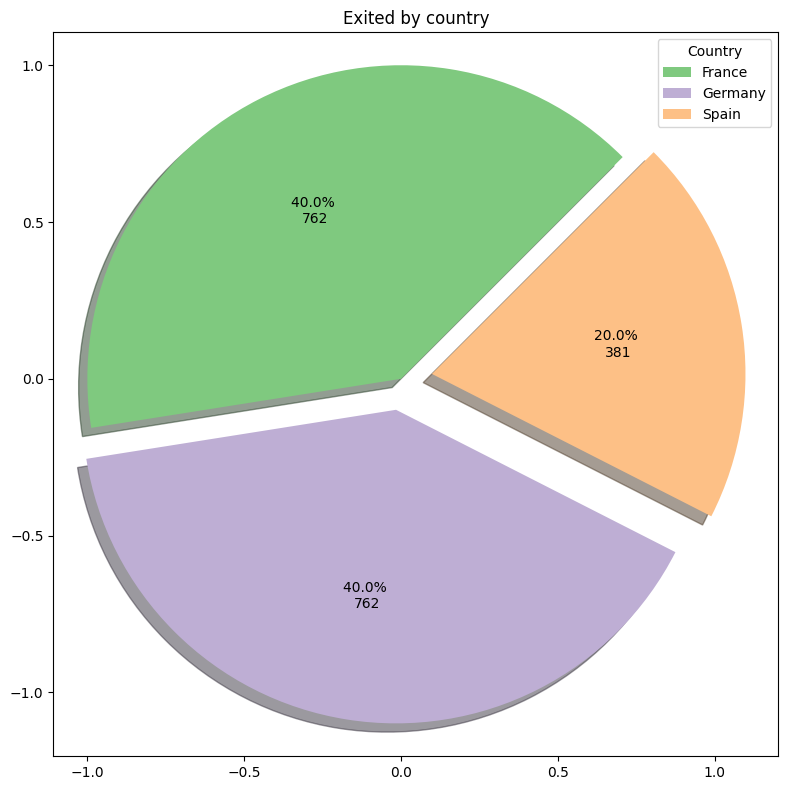

In [87]:
##Exited by country plot
explode = (0, 0.1, 0.1)
plt.figure(figsize=(10,8))
plt.title(f"Exited by country")
plt.pie(country, autopct= lambda pct: func(pct, np.sum(country.values)), explode=explode, 
        shadow=True, startangle=45, colors=plt.cm.Accent.colors, frame=True)
plt.legend(country.index, title= "Country")
plt.tight_layout()
plt.savefig(f"img/exited_by_country.png")
plt.show()
    

The least people who left are from Spain. As for France and Germany there are the same numbers

In [88]:
##Showing value counts of number of bought products
df["NumOfProducts"].value_counts()

NumOfProducts
1    4692
2    4282
3     253
4      59
Name: count, dtype: int64

In [89]:
##Number of prodcuts bought by users by gender
products_by_gender = df.pivot_table(index="NumOfProducts", columns="Gender", values="Tenure", aggfunc="count")
products_by_gender

Gender,Female,Male
NumOfProducts,,
1,2124,2568
2,1910,2372
3,141,112
4,37,22


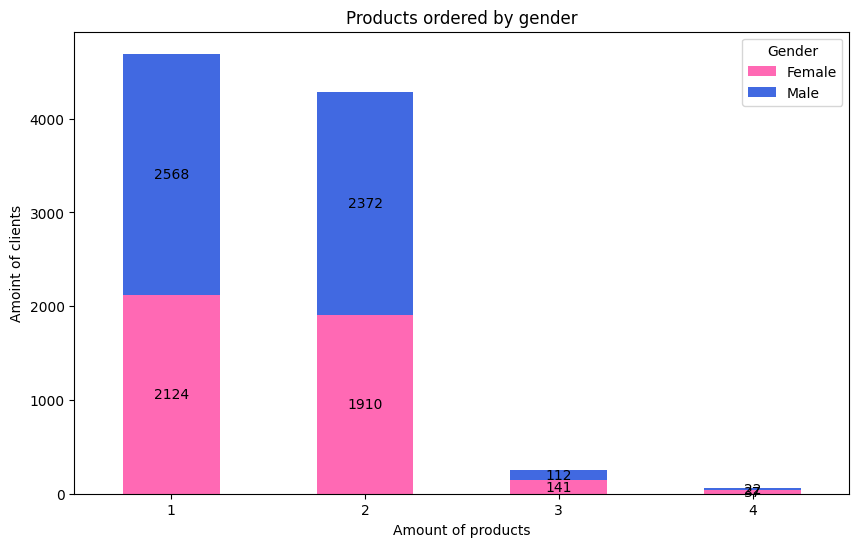

In [90]:
##Plots of products by order bought by different genders
colors = ["#FF69B4", "#4169E1"] 
ax = products_by_gender.plot(kind="bar", stacked=True, figsize=(10, 6), color = colors)
plt.title("Products ordered by gender")
plt.xlabel("Amount of products")
plt.ylabel("Amoint of clients")
plt.xticks(rotation=0)
plt.legend(title="Gender")
for container in ax.containers:
    ax.bar_label(container, label_type="center")
plt.savefig("img/products_by_gender.png")
plt.show()


People mostly buy one ore two products by order. These amount is mostly bought by men. As for the orders with more than 3 products they are mostly made by women. 

In [91]:
##Preparing data for tenure by age visualization
tenure_by_age = df.pivot_table(index="age_cohort", columns="Tenure", values="Gender", aggfunc="count")
tenure_by_age

C:\Users\ylokt\AppData\Local\Temp\ipykernel_4536\3840241314.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tenure_by_age = df.pivot_table(index="age_cohort", columns="Tenure", values="Gender", aggfunc="count")


Tenure,1,2,3,4,5,6,7,8,9,10
age_cohort,,,,,,,,,,
18-24,48,46,59,57,59,51,77,63,42,36
25-34,361,370,356,381,345,336,357,386,360,154
35-44,376,407,380,348,378,387,383,359,364,188
45-54,147,138,115,133,135,121,132,137,123,76
55-65,69,58,67,43,55,38,55,54,56,20


In [92]:
##Saving dataset
df.to_csv("dataset/Edited_data.csv", index=False)

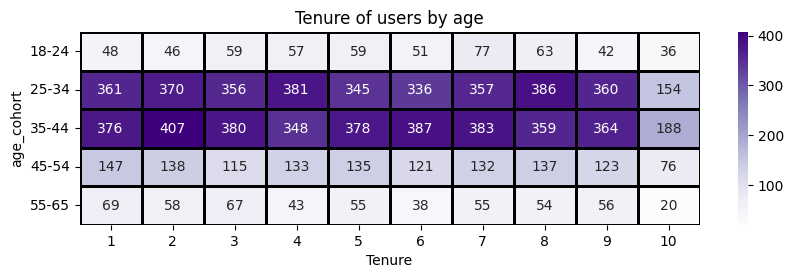

In [83]:
##Tensure by users age
plt.figure(figsize=(10, len(tenure_by_age) * 0.5))
sns.heatmap(tenure_by_age, cmap="Purples", annot=True, fmt="g", cbar=True, linewidths=1, linecolor="black")
plt.title("Tenure of users by age")
plt.savefig("img/Tenure_by_age.png")
plt.show()


Users who have the most tenure are aged from 25 to 44

## Conclusions

- The majority of users are aged between 25 and 44 years.
- Male users tend to have higher estimated salaries and account balances than females.
- Most customers who exited the bank are females aged 35–54 from Germany and France.
- Customers with longer tenure are also mostly in the 25–44 age group.
- Most users buy 1 or 2 products; women are more likely to buy 3+.
- Active users are predominantly from France and in the 25–44 age range.

These insights will help guide feature selection and preprocessing steps for the machine learning model.